In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import warnings
import os
from PIL import Image
warnings.filterwarnings("ignore")
from scipy import stats
from plotly.subplots import make_subplots
#import sweetviz as sv
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [124]:
df = pd.read_csv("data.csv")

In [125]:
df.head()

ID   Manufacturer    Model  Year   Category  Mileage FuelType EngineVolume  \
0   0            BMW       M6  2014      Coupe  33500.0   Petrol          4.4   
1   1  MERCEDES-BENZ  GLA 250  2015      Sedan  43000.0   Petrol          2.0   
2   2            KIA    Forte  2014      Sedan  83000.0   Petrol          2.0   
3   3          HONDA      FIT  2014  Hatchback  80000.0   Petrol          1.5   
4   4          HONDA      FIT  2019  Hatchback   1500.0   Petrol          1.5   

  DriveWheels    GearBox Doors       Wheel   Color InteriorColor  \
0        Rear  Tiptronic   4/5  Left wheel   White         Black   
1         4x4  Tiptronic   4/5  Left wheel     Red         Black   
2       Front  Automatic   4/5  Left wheel   Black         Black   
3       Front     Manual   4/5  Left wheel    Grey         Black   
4       Front  Automatic   4/5  Left wheel  Yellow         Black   

                 VIN  LeatherInterior  Price  Clearance  
0                NaN             True  39000      False  
1                NaN             True  10900      False  
2  KNAFU4A20D5735699            False   4500       True  
3                NaN            False   3650      False  
4                NaN            False   8700      False

In [126]:
df.shape

(93100, 18)

In [127]:
df.size

1675800

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93100 entries, 0 to 93099
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               93100 non-null  int64  
 1   Manufacturer     93096 non-null  object 
 2   Model            92090 non-null  object 
 3   Year             93100 non-null  int64  
 4   Category         93100 non-null  object 
 5   Mileage          93055 non-null  float64
 6   FuelType         87155 non-null  object 
 7   EngineVolume     92469 non-null  object 
 8   DriveWheels      86846 non-null  object 
 9   GearBox          91833 non-null  object 
 10  Doors            85463 non-null  object 
 11  Wheel            87238 non-null  object 
 12  Color            82933 non-null  object 
 13  InteriorColor    65383 non-null  object 
 14  VIN              41633 non-null  object 
 15  LeatherInterior  93100 non-null  bool   
 16  Price            93100 non-null  int64  
 17  Clearance   

In [129]:
df['Price'].notna().sum()

93100

In [130]:
df.describe()

ID          Year       Mileage         Price
count  93100.000000  93100.000000  9.305500e+04  9.310000e+04
mean   46549.500000   1996.088067  1.085321e+06  2.719070e+03
std    26875.799368    178.752806  4.150213e+07  2.286156e+04
min        0.000000      0.000000  0.000000e+00  0.000000e+00
25%    23274.750000   2010.000000  4.544900e+04  0.000000e+00
50%    46549.500000   2013.000000  1.080870e+05  0.000000e+00
75%    69824.250000   2015.000000  1.806590e+05  3.600000e+03
max    93099.000000   2020.000000  2.147484e+09  6.666666e+06

In [131]:
df.isnull().sum()

ID                     0
Manufacturer           4
Model               1010
Year                   0
Category               0
Mileage               45
FuelType            5945
EngineVolume         631
DriveWheels         6254
GearBox             1267
Doors               7637
Wheel               5862
Color              10167
InteriorColor      27717
VIN                51467
LeatherInterior        0
Price                  0
Clearance              0
dtype: int64

In [132]:
df.isnull().sum()[df.isnull().sum() > 2]

Manufacturer         4
Model             1010
Mileage             45
FuelType          5945
EngineVolume       631
DriveWheels       6254
GearBox           1267
Doors             7637
Wheel             5862
Color            10167
InteriorColor    27717
VIN              51467
dtype: int64

In [133]:
nan_value = df.isna().sum(axis=1)
df_cleaned = df[nan_value <= 2]
print(f'Number of rows after removing those with more than 2 NaN values: {df_cleaned.shape[0]}')
count_perrow_cleaned = df_cleaned.isna().sum(axis=1)
cleaned_more_2_nans = count_perrow_cleaned[count_perrow_cleaned > 2]
overall = cleaned_more_2_nans.count()
print(f'Number of rows with more than 2 NaN values after cleaning: {overall}')

Number of rows after removing those with more than 2 NaN values: 80986
Number of rows with more than 2 NaN values after cleaning: 0


In [134]:
print(df_cleaned.isnull().sum())

ID                     0
Manufacturer           0
Model                 36
Year                   0
Category               0
Mileage                0
FuelType             156
EngineVolume         627
DriveWheels          714
GearBox              289
Doors               1281
Wheel                  0
Color               1096
InteriorColor      18845
VIN                39554
LeatherInterior        0
Price                  0
Clearance              0
dtype: int64


In [135]:
columns_to_remove = ['VIN', 'InteriorColor']
df_cleaned = df_cleaned.drop(columns=columns_to_remove)
print(df_cleaned.columns)

Index(['ID', 'Manufacturer', 'Model', 'Year', 'Category', 'Mileage',
       'FuelType', 'EngineVolume', 'DriveWheels', 'GearBox', 'Doors', 'Wheel',
       'Color', 'LeatherInterior', 'Price', 'Clearance'],
      dtype='object')


In [136]:
df_cleaned.shape

(80986, 16)

In [137]:
df_cleaned.isnull().sum()

ID                    0
Manufacturer          0
Model                36
Year                  0
Category              0
Mileage               0
FuelType            156
EngineVolume        627
DriveWheels         714
GearBox             289
Doors              1281
Wheel                 0
Color              1096
LeatherInterior       0
Price                 0
Clearance             0
dtype: int64

In [138]:
# Group by 'Category' and count NaN values in 'Color'
nan_counts_by_category = df_cleaned.groupby('Category')['Color'].apply(lambda x: x.isna().sum())

# Print the results
print("Number of NaN values in 'Color' by category:")
print(nan_counts_by_category)


Number of NaN values in 'Color' by category:
Category
Cabriolet        1
Coupe           44
Goods wagon      0
Hatchback      108
Jeep           629
Limousine        0
Microbus         0
Minivan          0
Pickup           2
Sedan          310
Universal        2
Name: Color, dtype: int64


In [139]:
##df_cleaned = df_cleaned[df_cleaned['Price'] != 0]

In [140]:
df_cleaned.isnull().sum()

ID                    0
Manufacturer          0
Model                36
Year                  0
Category              0
Mileage               0
FuelType            156
EngineVolume        627
DriveWheels         714
GearBox             289
Doors              1281
Wheel                 0
Color              1096
LeatherInterior       0
Price                 0
Clearance             0
dtype: int64

In [141]:
df_cleaned = df_cleaned.dropna(subset=['Color'])

In [142]:
df_cleaned.isnull().sum()

ID                    0
Manufacturer          0
Model                35
Year                  0
Category              0
Mileage               0
FuelType            156
EngineVolume        619
DriveWheels         705
GearBox             282
Doors              1281
Wheel                 0
Color                 0
LeatherInterior       0
Price                 0
Clearance             0
dtype: int64

In [143]:
df_cleaned.shape

(79890, 16)

In [144]:
df_cleaned.describe()

ID          Year       Mileage         Price
count  79890.000000  79890.000000  7.989000e+04  7.989000e+04
mean   48966.972475   2012.245913  1.021867e+06  2.871133e+03
std    25838.637579     16.690042  4.023534e+07  2.415800e+04
min        0.000000      0.000000  0.000000e+00  0.000000e+00
25%    27730.250000   2011.000000  5.800000e+04  0.000000e+00
50%    48704.500000   2013.000000  1.204100e+05  1.250000e+02
75%    71702.750000   2016.000000  1.890000e+05  4.100000e+03
max    93099.000000   2020.000000  2.147484e+09  6.666666e+06

In [145]:
df_cleaned['Price'].max()

6666666

In [146]:
 #column = 'Price'  # Replace 'Price' with the column name you want to plot

 # Assume df_cleaned is your DataFrame and 'column' is the column name you're plotting
#df_cleaned_for_plotting = df_cleaned.reset_index(drop=True)

# # Scatter plot for data
 #sns.scatterplot(x=df_cleaned_for_plotting.index, y=df_cleaned_for_plotting[column], label='Data')

# # Ensure outliers_iqr is a boolean mask or list of indices within the range of df_cleaned_for_plotting
# outliers_iqr = [i for i in outliers_iqr if i < len(df_cleaned_for_plotting)]

# # Highlight outliers
 #plt.scatter(df_cleaned_for_plotting.index[outliers_iqr], df_cleaned_for_plotting.loc[outliers_iqr, column],
             #color='red', label='Outliers', marker='o')

#plt.title(f'Scatter Plot of {column}')
#plt.xlabel('Index')
#plt.ylabel(column)
#plt.legend()
#plt.show()


In [147]:
# Plot the boxplot for 'Price'
#plt.figure(figsize=(10, 6))
#sns.boxplot(x=df_cleaned['Price'], color='lightblue')
#plt.title('Boxplot of Price')
#plt.xlabel('Price')
#plt.show()

In [148]:
df_cleaned = df_cleaned[df_cleaned['Price']< 100000]

In [149]:
df_cleaned['FuelType'].fillna(method='bfill', inplace=True)
df_cleaned['FuelType'].value_counts(dropna = False)
print("Unique values in 'FuelType' column:", df_cleaned['FuelType'].unique())

Unique values in 'FuelType' column: ['Petrol' 'Diesel' 'CNG' 'Hybrid' 'LPG' 'Plug-in Hybrid' 'Electric'
 'Hydrogen']


In [150]:
print("Unique values in 'DriveWheels' column:", df_cleaned['DriveWheels'].unique())

Unique values in 'DriveWheels' column: ['Rear' '4x4' 'Front' nan]


In [151]:
print("Unique values in 'EngineVolume' column:", df_cleaned['EngineVolume'].unique())

Unique values in 'EngineVolume' column: ['4.4' '2.0' '1.5' '0.9' '1.3' '1.8' '1.6' '3.0' '3.5' '1.4' '6.3' '2.5'
 '4.5' '4.7' '1.0' '2.4' '5.0' '2.2' '2.3' '5.9' '4.0' '3.7' '4.6' '5.5'
 '4.8' '3.6' '5.7' '3.2' '3.3' '12.9' '1.9' '3.8' '1.2' '2.6' '2.7' '6.0'
 '1.7' '2.8' '0.1' '4.3' '2.9' '0.7' '0.0' '1.1' '5.8' '0.5' nan '6.2'
 '2.1' '3.4' '5.3' '4.2' '3.1' '5.2' '0.3' '4.9' '0.2' '0.8' '5.6' '0.4'
 '0.6' '6.6' '6.7' '3.9' '5.4' '6.4' '5.1' '6.1' '20.0' '13.0' '7.3'
 '10.8' '10.0']


In [152]:
#df_cleaned['Doors'].fillna('2', inplace=True)
df_cleaned['Doors'].fillna(method='bfill', inplace=True)
df_cleaned['Doors'].value_counts(dropna = False)
print("Unique values in 'Doors' column:", df_cleaned['Doors'].unique())

Unique values in 'Doors' column: ['4/5' '2/3' '>5']


In [153]:
df_cleaned['GearBox'].value_counts(dropna=False)

GearBox
Automatic    66684
Tiptronic     6804
Manual        4578
Variator      1536
NaN            282
Name: count, dtype: int64

In [154]:
df_cleaned['GearBox'].fillna(df_cleaned['GearBox'].mode()[0], inplace=True)
print("Unique values in 'GearBox' column:", df_cleaned['GearBox'].unique())

Unique values in 'GearBox' column: ['Tiptronic' 'Automatic' 'Manual' 'Variator']


In [155]:
df_cleaned['DriveWheels'].fillna(df_cleaned['DriveWheels'].mode()[0], inplace=True)
print(f'Number of null values in "DriveWheels" after filling: {df_cleaned["DriveWheels"].isna().sum()}')

Number of null values in "DriveWheels" after filling: 0


Value counts for "DriveWheels":
DriveWheels
Front    43466
4x4      26440
Rear      9978
Name: count, dtype: int64


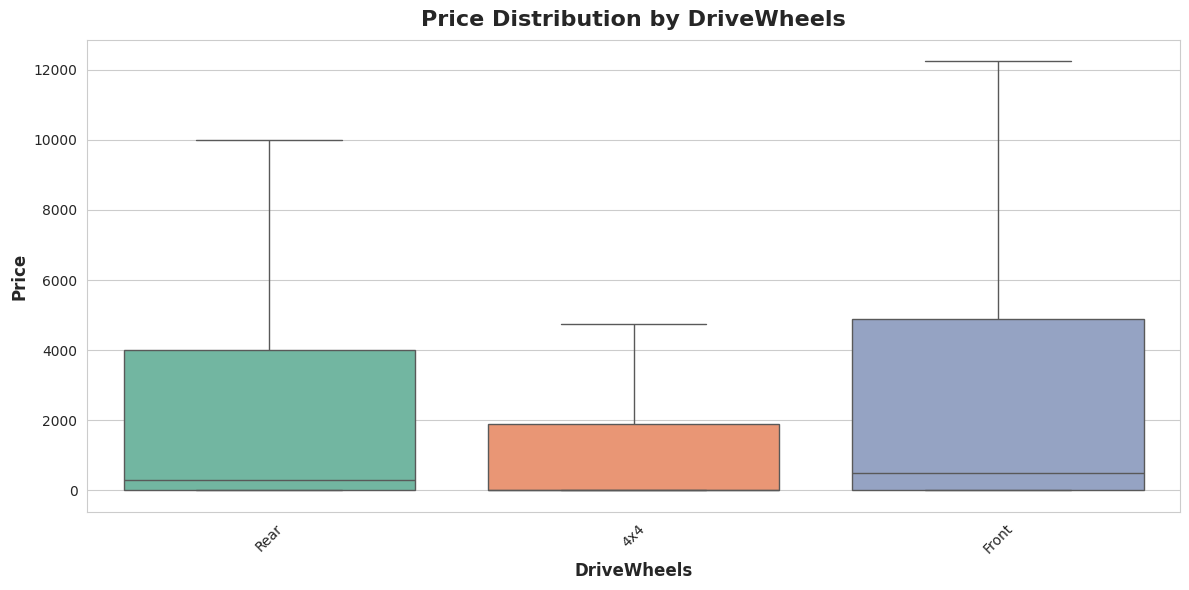

In [156]:
count_drive_wheel = df_cleaned['DriveWheels'].value_counts(dropna=False)
print(f'Value counts for "DriveWheels":\n{count_drive_wheel}')
# Plot distribution of 'Price' based on 'DriveWheels'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='DriveWheels', y='Price', palette="Set2", showfliers=False)
plt.title('Price Distribution by DriveWheels')
plt.xlabel('DriveWheels')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


array([[<Axes: title={'center': 'Price'}>]], dtype=object)

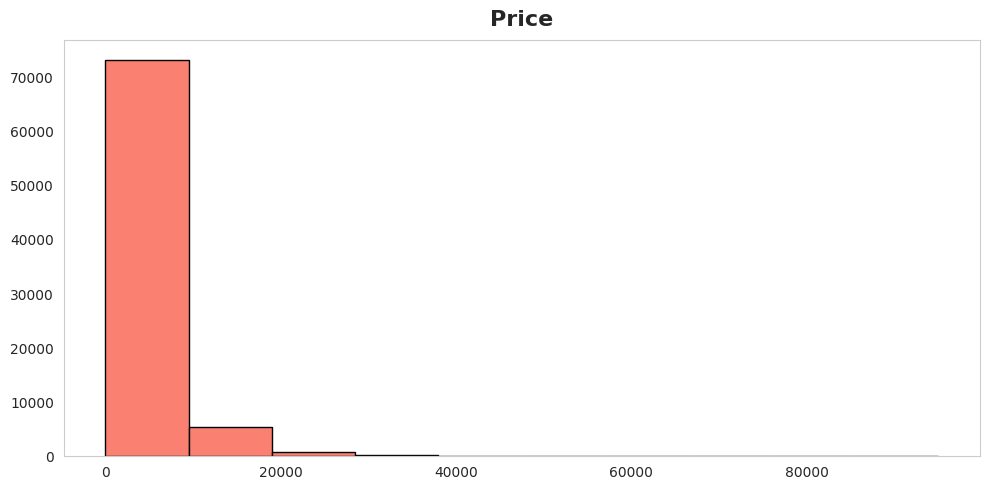

In [157]:
df_cleaned.hist(column='Price', bins=10, grid=False, figsize=(10, 5), color='salmon', edgecolor='black')

(array([7.3337e+04, 5.4100e+03, 7.6900e+02, 1.9200e+02, 9.8000e+01,
        3.6000e+01, 1.6000e+01, 1.3000e+01, 1.0000e+01, 3.0000e+00]),
 array([    0.,  9500., 19000., 28500., 38000., 47500., 57000., 66500.,
        76000., 85500., 95000.]),
 <BarContainer object of 10 artists>)

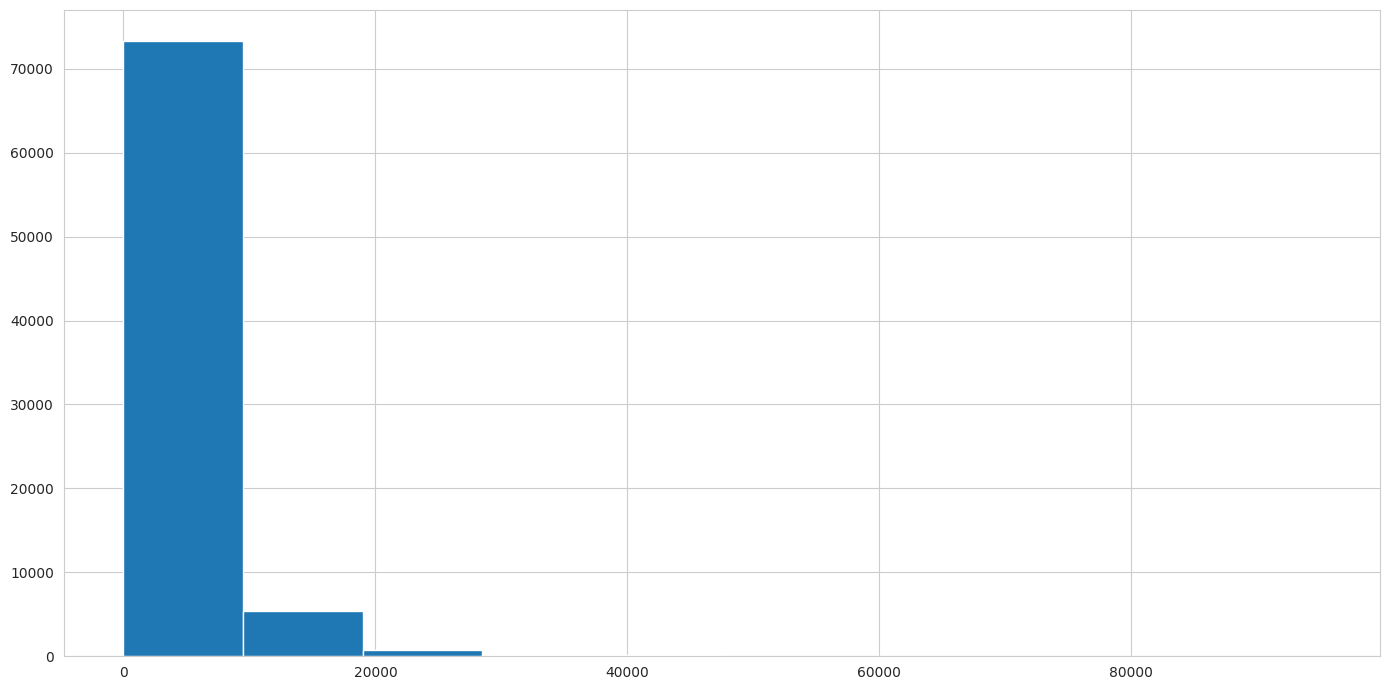

In [158]:
plt.hist(df_cleaned['Price'])

(array([3.8853e+04, 7.4120e+03, 7.1740e+03, 1.3558e+04, 8.5060e+03,
        3.4850e+03, 6.4400e+02, 1.7900e+02, 5.0000e+01, 2.3000e+01]),
 array([ 0.        ,  4.56290264,  9.12580527, 13.68870791, 18.25161054,
        22.81451318, 27.37741581, 31.94031845, 36.50322108, 41.06612372,
        45.62902635]),
 <BarContainer object of 10 artists>)

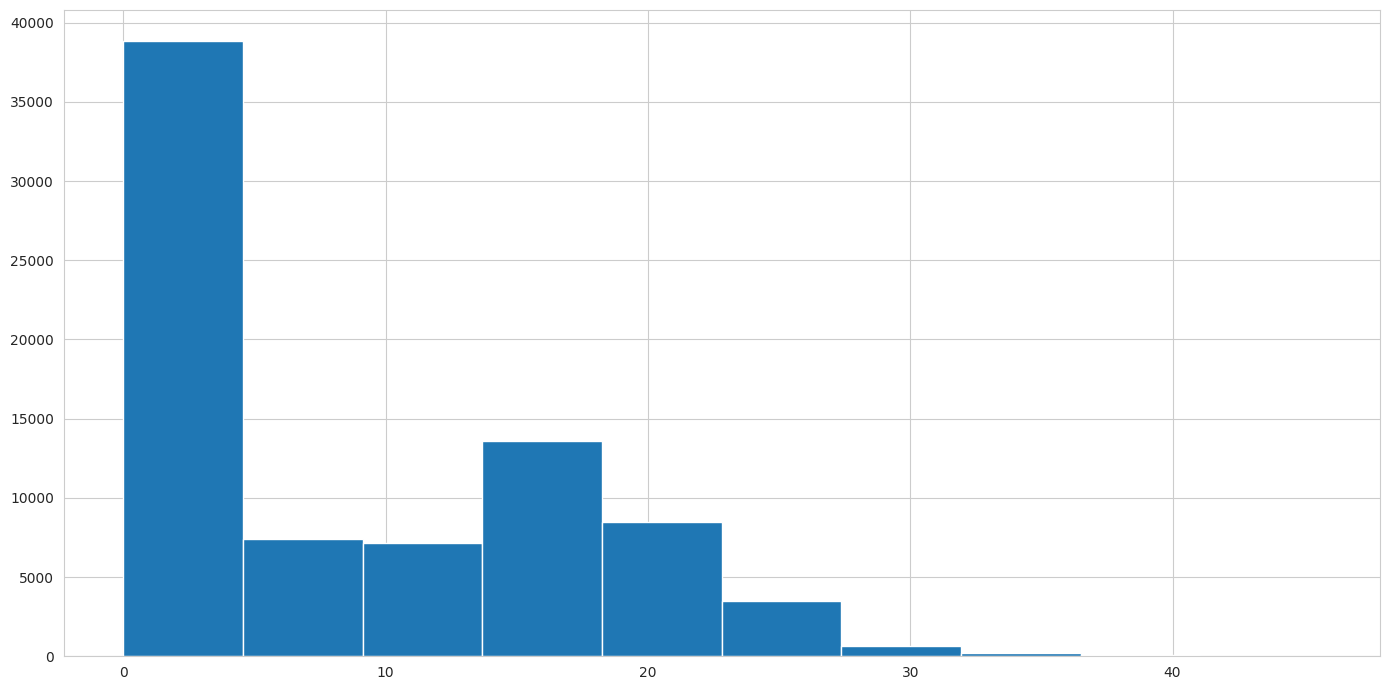

In [159]:
plt.hist(np.cbrt(df_cleaned['Price']))

In [160]:
#plt.hist(np.log(df_cleaned['Price']))

In [161]:
df_cleaned['Price'] =  np.cbrt(df_cleaned['Price'])

(array([3.8853e+04, 7.4120e+03, 7.1740e+03, 1.3558e+04, 8.5060e+03,
        3.4850e+03, 6.4400e+02, 1.7900e+02, 5.0000e+01, 2.3000e+01]),
 array([ 0.        ,  4.56290264,  9.12580527, 13.68870791, 18.25161054,
        22.81451318, 27.37741581, 31.94031845, 36.50322108, 41.06612372,
        45.62902635]),
 <BarContainer object of 10 artists>)

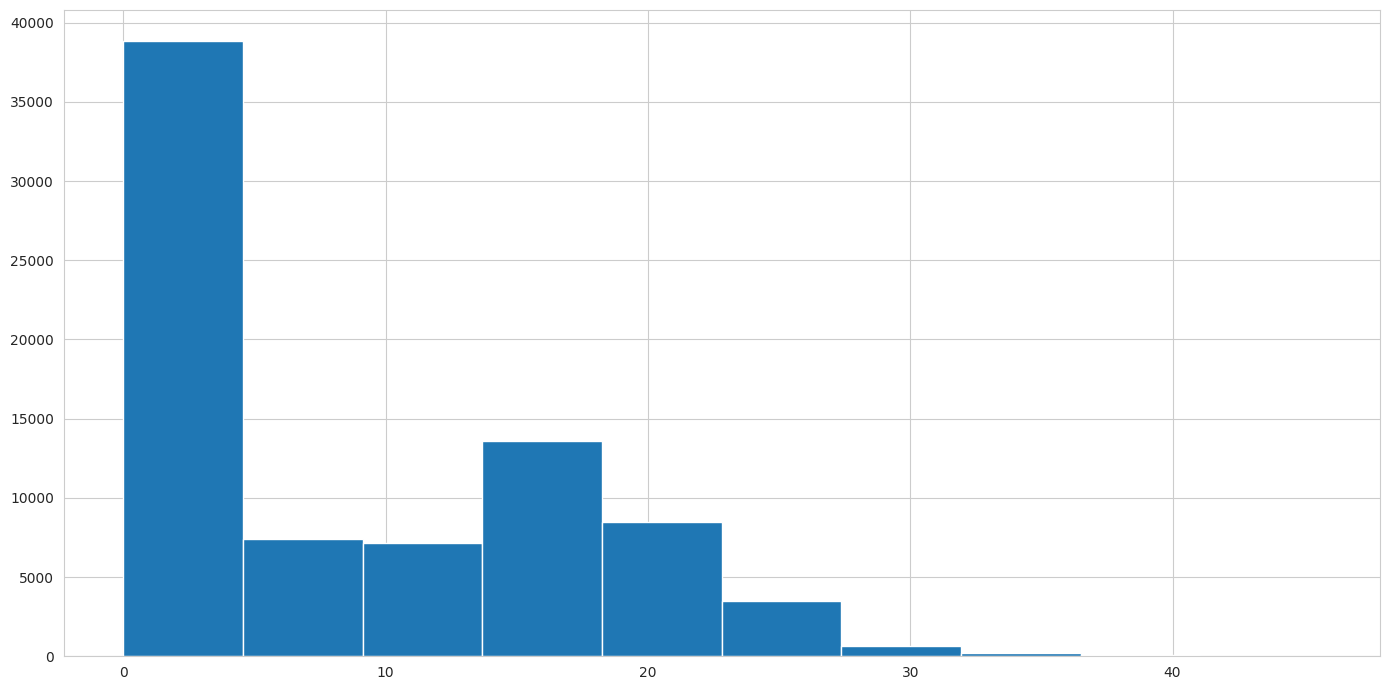

In [162]:
plt.hist(df_cleaned['Price'])

In [163]:
df_cleaned['EngineVolume'] = pd.to_numeric(df_cleaned['EngineVolume'], errors='coerce')
# Calculate the median of the 'EngineVolume' column, excluding NaN values
median_engine_volume = df_cleaned['EngineVolume'].median()
# Fill missing values (NaNs) in 'EngineVolume' with the median value
df_cleaned['EngineVolume'].fillna(median_engine_volume, inplace=True)

In [164]:
print("Unique values in 'EngineVolume' column:", df_cleaned['EngineVolume'].unique())

Unique values in 'EngineVolume' column: [ 4.4  2.   1.5  0.9  1.3  1.8  1.6  3.   3.5  1.4  6.3  2.5  4.5  4.7
  1.   2.4  5.   2.2  2.3  5.9  4.   3.7  4.6  5.5  4.8  3.6  5.7  3.2
  3.3 12.9  1.9  3.8  1.2  2.6  2.7  6.   1.7  2.8  0.1  4.3  2.9  0.7
  0.   1.1  5.8  0.5  6.2  2.1  3.4  5.3  4.2  3.1  5.2  0.3  4.9  0.2
  0.8  5.6  0.4  0.6  6.6  6.7  3.9  5.4  6.4  5.1  6.1 20.  13.   7.3
 10.8 10. ]


In [165]:
print("Unique values in 'Doors' column:", df_cleaned['Doors'].unique())

Unique values in 'Doors' column: ['4/5' '2/3' '>5']


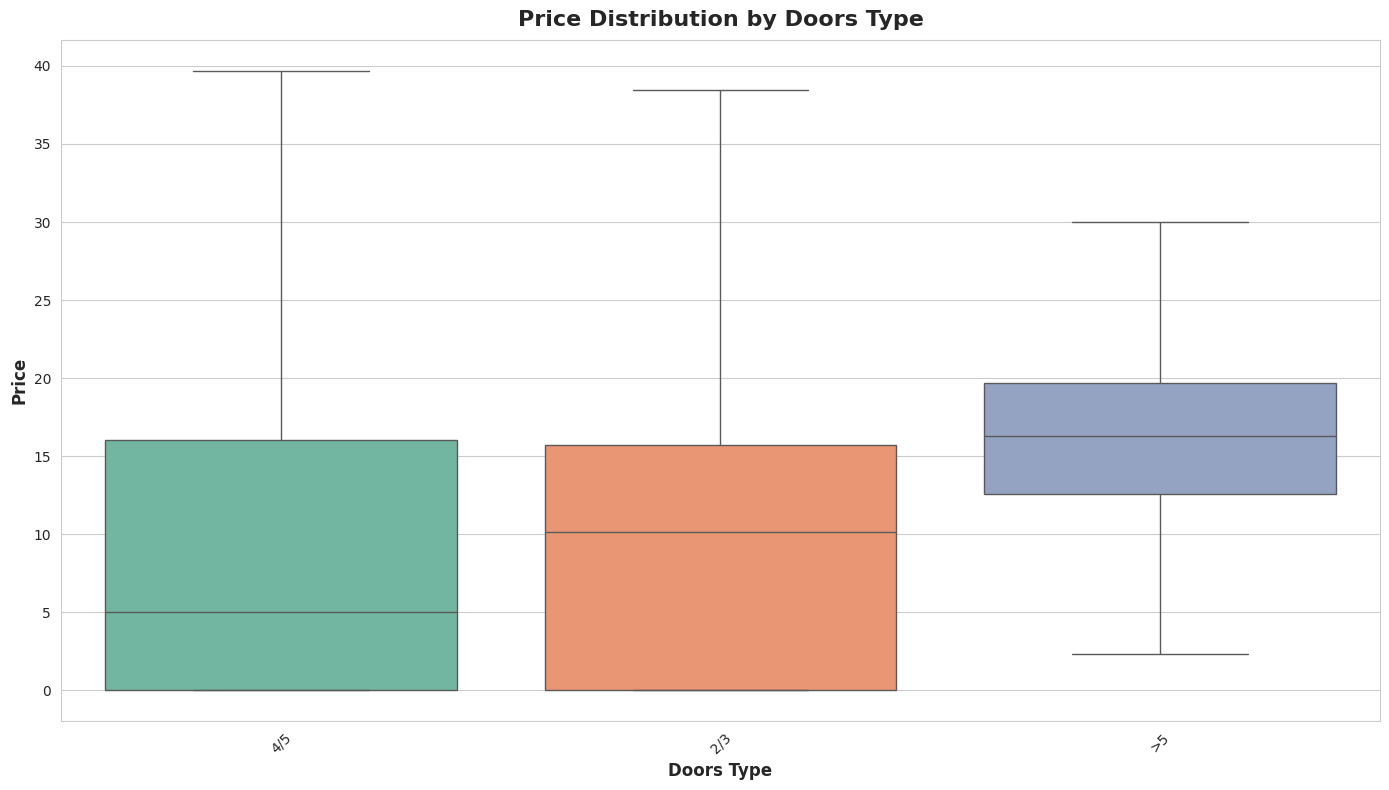

In [166]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned, x='Doors', y='Price', palette="Set2", showfliers=False)  # `showfliers=False` to exclude extreme outliers for clearer visualization
plt.title('Price Distribution by Doors Type')
plt.xticks(rotation=45)  # Rotate x labels if necessary for better readability
plt.xlabel('Doors Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [167]:
# Fill NaN in 'Model' based on 'Manufacturer'
df_cleaned['Model'] = df_cleaned.groupby('Manufacturer')['Model'].transform(lambda x: x.fillna(x.mode()[0]))

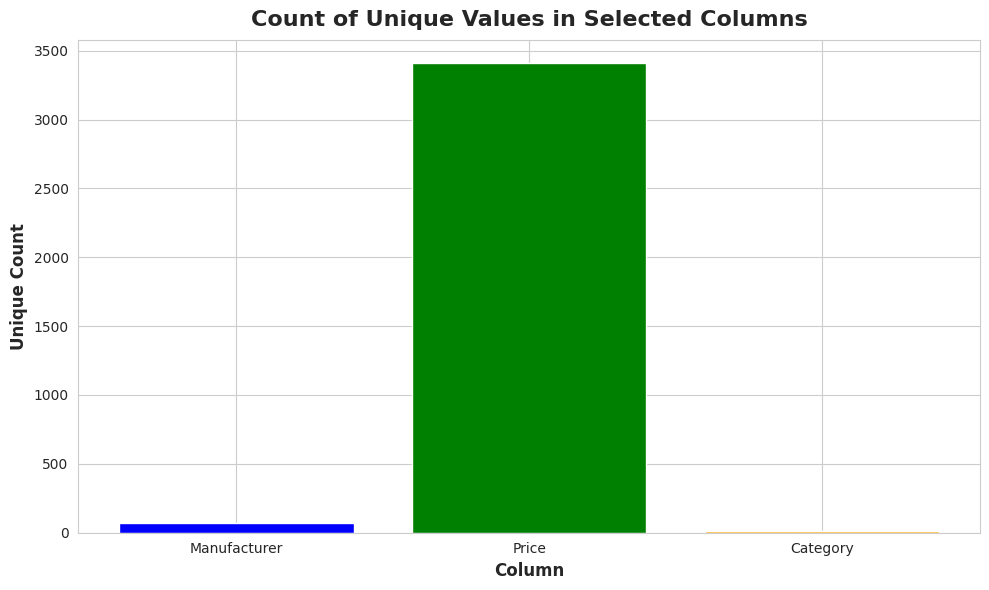

In [168]:
# Count unique values for Manufacturer, Price, and Category
counts = {
    'Manufacturer': df_cleaned['Manufacturer'].nunique(),
    'Price': df_cleaned['Price'].nunique(),
    'Category': df_cleaned['Category'].nunique()
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values(), color=['blue', 'green', 'orange'])
plt.xlabel('Column')
plt.ylabel('Unique Count')
plt.title('Count of Unique Values in Selected Columns')
plt.show()

In [169]:
# Define a function to detect outliers using IQR method
def detect_outliers_iqr(df1, columns):
    outlier_indices = []

    for column in columns:
        if df[column].dtype in [np.float64, np.int64]:  # Only apply IQR to numeric columns
            Q1 = df1[column].quantile(0.25)
            Q3 = df1[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)].index
            outlier_indices.extend(outliers)

    # Get unique indices to avoid duplicate entries
    return list(set(outlier_indices))

# Columns to check for outliers
numeric_columns = ['Year', 'Mileage', 'EngineVolume', 'Price', 'Clearance']
outliers_iqr = detect_outliers_iqr(df_cleaned, numeric_columns)

# Print number of outliers detected
print(f"Number of outliers detected using IQR: {len(outliers_iqr)}")

# Optional: Drop outliers from df_cleaned
df_clean = df_cleaned.drop(index=outliers_iqr)

# Print number of rows after removing outliers
print(f"Number of rows after removing outliers using IQR: {df_clean.shape[0]}")


Number of outliers detected using IQR: 6140
Number of rows after removing outliers using IQR: 73744


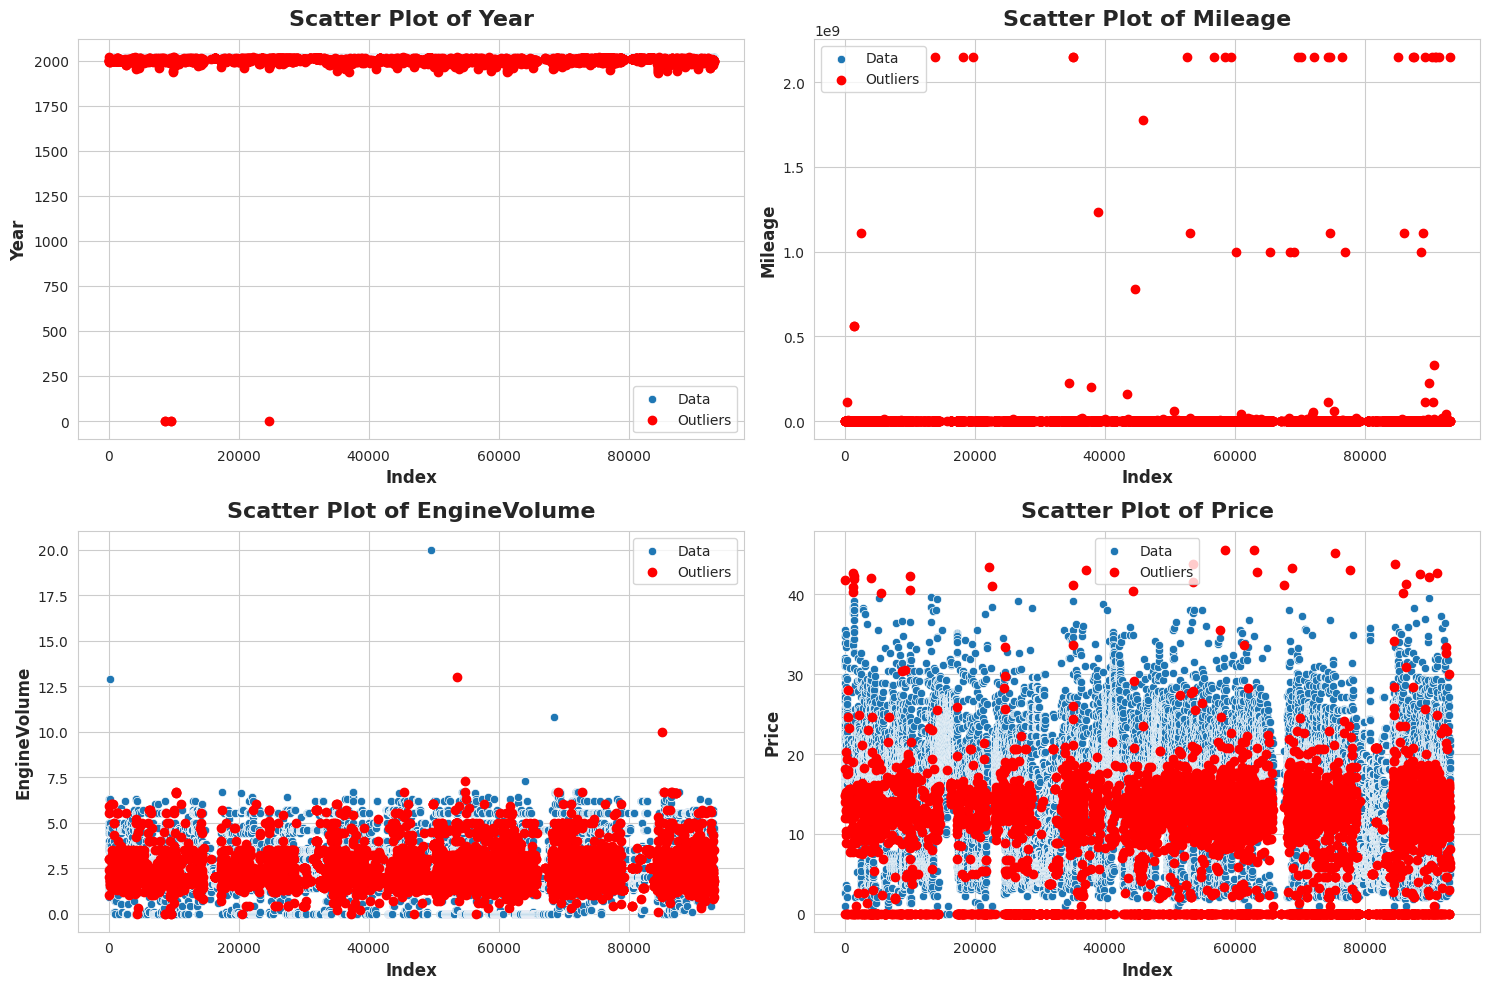

In [170]:
# Define columns for scatter plot
scatter_columns = ['Year', 'Mileage', 'EngineVolume', 'Price']  # Example columns for scatter plots

# Prepare the plotting data
df_cleaned_for_plotting = df_cleaned.copy()

# Ensure numeric columns are properly formatted
for column in scatter_columns:
    df_cleaned_for_plotting[column] = pd.to_numeric(df_cleaned_for_plotting[column], errors='coerce')

# Plot scatter plots with outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(scatter_columns, 1):
    plt.subplot(2, 2, i)

    # Scatter plot of data
    sns.scatterplot(x=df_cleaned_for_plotting.index, y=df_cleaned_for_plotting[column], label='Data')

    # Highlight outliers
    plt.scatter(df_cleaned.loc[outliers_iqr].index, df_cleaned.loc[outliers_iqr, column], color='red', label='Outliers', marker='o')

    plt.title(f'Scatter Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()


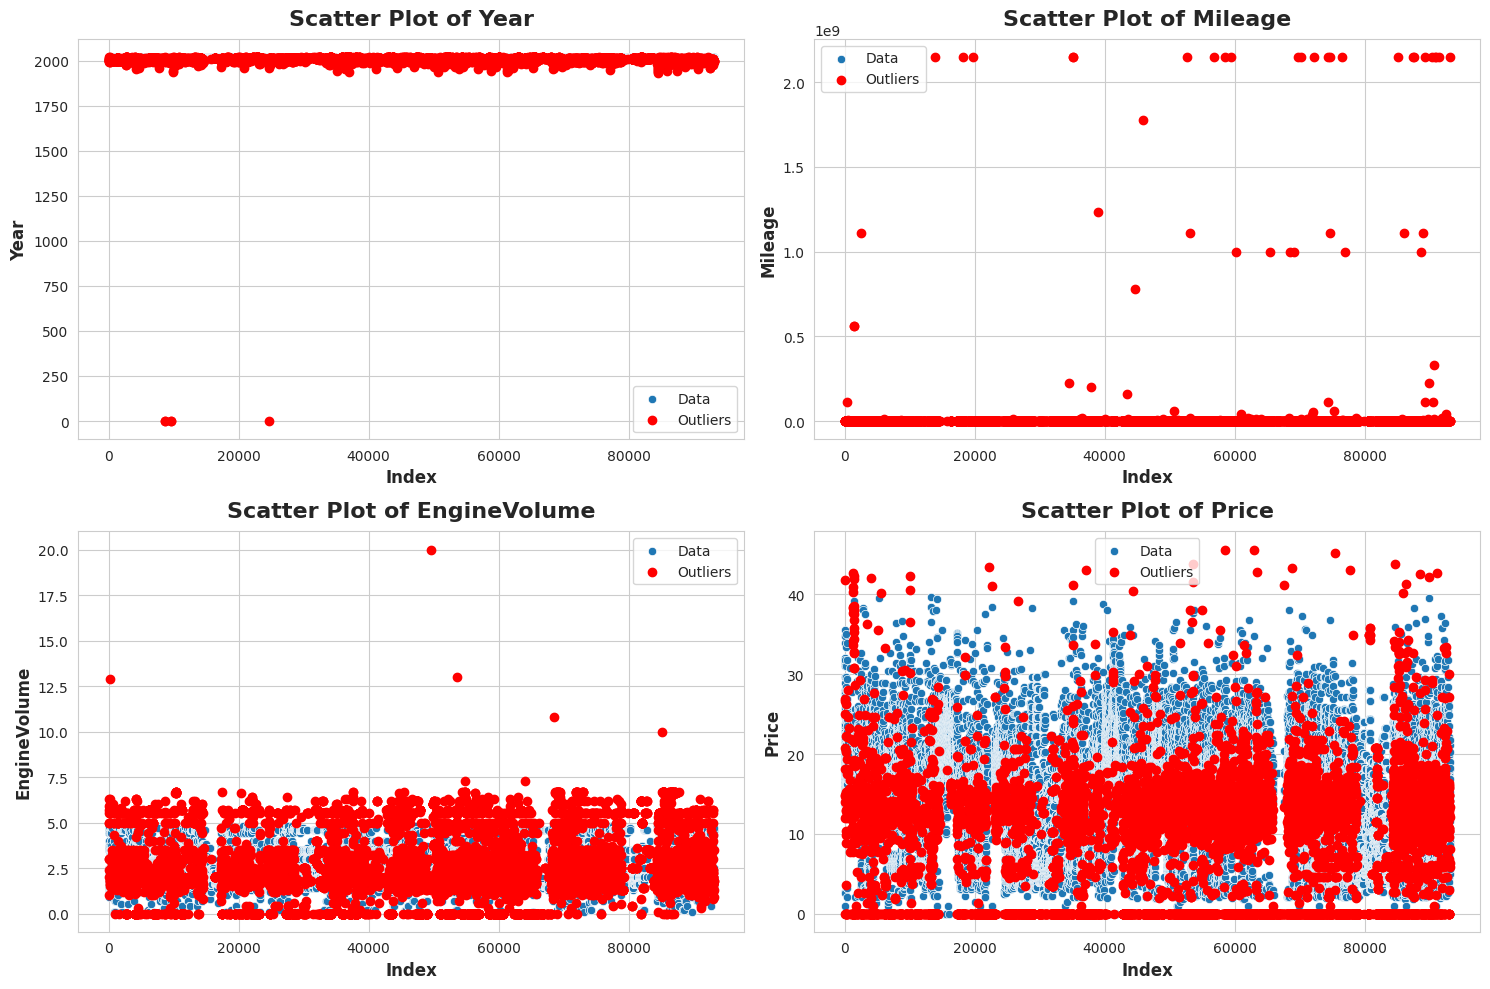

In [171]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, columns):
    outliers = pd.Series([False] * len(df), index=df.index)
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers |= (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Recompute outliers for the columns of interest
outliers_iqr = detect_outliers_iqr(df_cleaned_for_plotting, scatter_columns)

# Plot scatter plots with outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(scatter_columns, 1):
    plt.subplot(2, 2, i)

    # Scatter plot of data
    sns.scatterplot(x=df_cleaned_for_plotting.index, y=df_cleaned_for_plotting[column], label='Data')

    # Highlight outliers
    plt.scatter(df_cleaned_for_plotting.loc[outliers_iqr].index,
                df_cleaned_for_plotting.loc[outliers_iqr, column],
                color='red', label='Outliers', marker='o')

    plt.title(f'Scatter Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

In [172]:
df_cleaned.isnull().sum()

ID                 0
Manufacturer       0
Model              0
Year               0
Category           0
Mileage            0
FuelType           0
EngineVolume       0
DriveWheels        0
GearBox            0
Doors              0
Wheel              0
Color              0
LeatherInterior    0
Price              0
Clearance          0
dtype: int64

In [173]:
df_cleaned.describe()

ID          Year       Mileage  EngineVolume         Price
count  79884.000000  79884.000000  7.988400e+04  79884.000000  79884.000000
mean   48965.672588   2012.246044  1.013834e+06      2.429831      8.020756
std    25838.045671     16.690428  4.019030e+07      1.045375      8.786876
min        0.000000      0.000000  0.000000e+00      0.000000      0.000000
25%    27729.750000   2011.000000  5.800000e+04      1.800000      0.000000
50%    48702.500000   2013.000000  1.204115e+05      2.200000      5.000000
75%    71700.250000   2016.000000  1.890000e+05      3.000000     16.005207
max    93099.000000   2020.000000  2.147484e+09     20.000000     45.629026

In [174]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79884 entries, 0 to 93099
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               79884 non-null  int64  
 1   Manufacturer     79884 non-null  object 
 2   Model            79884 non-null  object 
 3   Year             79884 non-null  int64  
 4   Category         79884 non-null  object 
 5   Mileage          79884 non-null  float64
 6   FuelType         79884 non-null  object 
 7   EngineVolume     79884 non-null  float64
 8   DriveWheels      79884 non-null  object 
 9   GearBox          79884 non-null  object 
 10  Doors            79884 non-null  object 
 11  Wheel            79884 non-null  object 
 12  Color            79884 non-null  object 
 13  LeatherInterior  79884 non-null  bool   
 14  Price            79884 non-null  float64
 15  Clearance        79884 non-null  bool   
dtypes: bool(2), float64(3), int64(2), object(9)
memory usage: 11.3+

In [175]:
import pandas as pd
import plotly.express as px

# Sample the data to make it manageable
sample_df = df_cleaned.sample(n=10000, random_state=1)

# Ensure 'Year' and 'EngineVolume' are numeric
sample_df['Year'] = pd.to_numeric(sample_df['Year'], errors='coerce')
sample_df['EngineVolume'] = pd.to_numeric(sample_df['EngineVolume'], errors='coerce')

# Remove rows with NaN values in 'Year' or 'EngineVolume'
sample_df = sample_df.dropna(subset=['Year', 'EngineVolume'])

# Create scatter plot using plotly express
fig = px.scatter(
    sample_df,
    x='Year',
    y='EngineVolume',
    color='Model',  # Different colors for different models
    title="EngineVolume vs Year by Car Model",
    labels={'Year': 'Year', 'EngineVolume': 'Engine Volume'}
)

# Add dropdown menu to select models
# The `color` parameter already handles different models with different colors
# Adding dropdown to toggle visibility of different models

# List of unique models
models = sample_df['Model'].unique()

# Create buttons for each model
buttons = [
    dict(
        label="All",
        method="update",
        args=[{"visible": [True] * len(models)},
              {"title": "EngineVolume vs Year by Car Model: All"}]
    )
] + [
    dict(
        label=model,
        method="update",
        args=[{"visible": [model == m for m in models]},
              {"title": f"EngineVolume vs Year by Car Model: {model}"}]
    )
    for model in models
]

# Update layout with dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            showactive=True
        )
    ]
)

# Show the plot
fig.show()


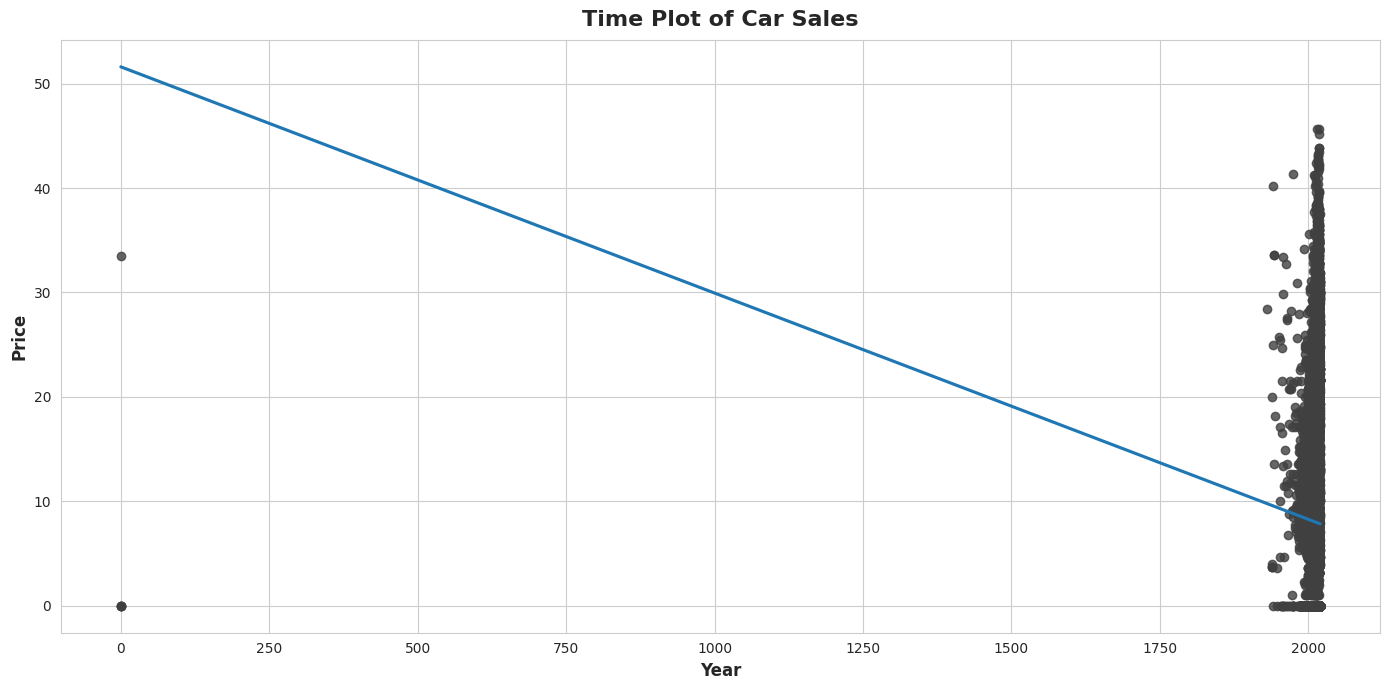

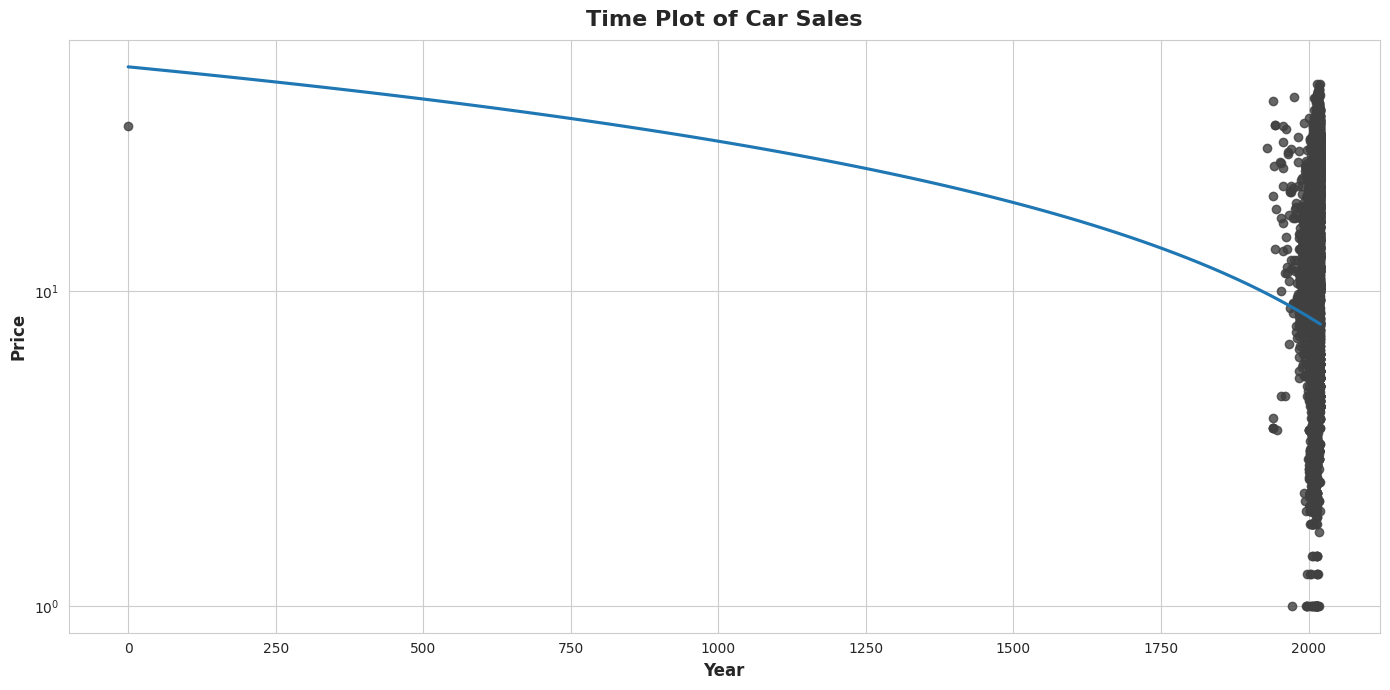

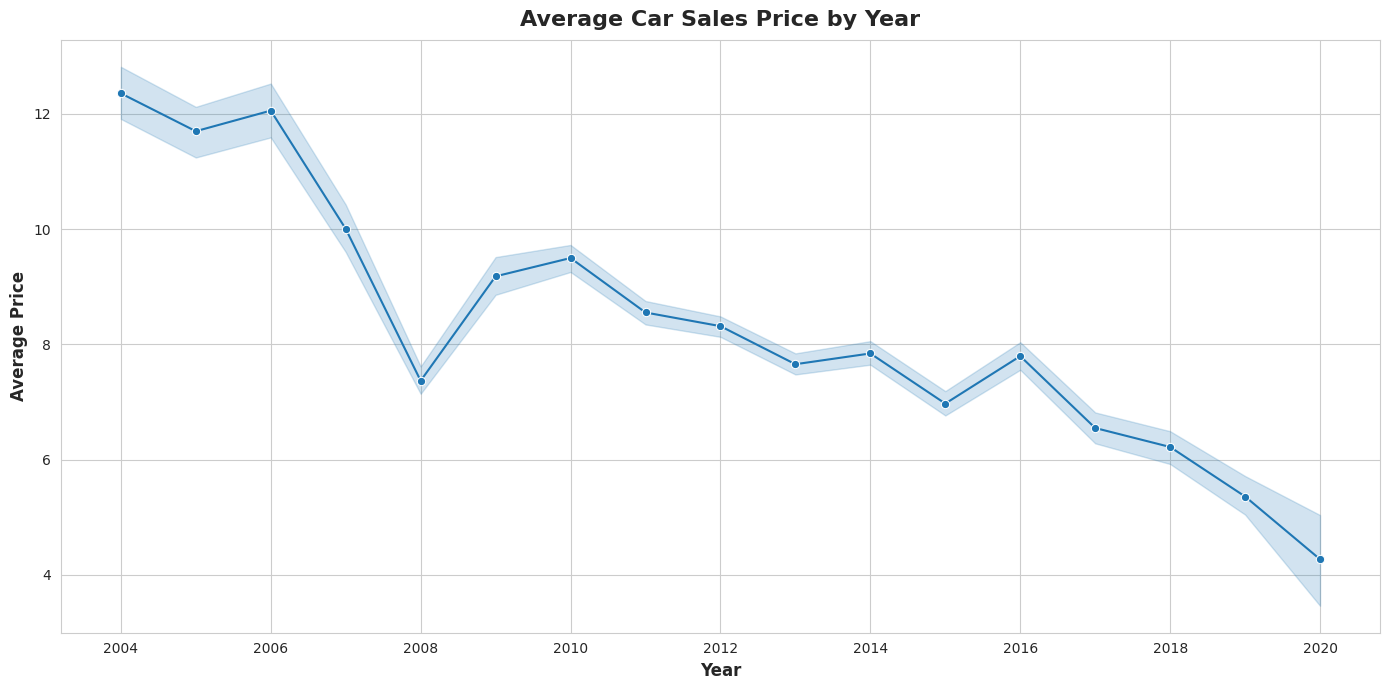

In [176]:
# Plotting and visualization setup
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Customize Matplotlib settings
plt.rc(
    "figure",
    autolayout=True,
    figsize=(14, 7),  # Increase figure size
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

# Basic regplot: Time Plot of Car Sales
fig, ax = plt.subplots()
sns.regplot(x='Year', y='Price', data=df_cleaned, ci=None, scatter_kws=dict(color='0.25'), ax=ax)
ax.set_title('Time Plot of Car Sales')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

# Log scale on y-axis
fig, ax = plt.subplots()
sns.regplot(x='Year', y='Price', data=df_cleaned, ci=None, scatter_kws=dict(color='0.25'), ax=ax)
ax.set_title('Time Plot of Car Sales')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_yscale('log')  # Apply log scale to y-axis
plt.show()

# Aggregating data by year and plotting average price per year
df_agg = df_cleaned.groupby('Year')['Price'].mean().reset_index()

fig, ax = plt.subplots()
sns.lineplot(x='Year', y='Price', data=df_clean, marker='o', ax=ax)
ax.set_title('Average Car Sales Price by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
plt.show()


array([[<Axes: title={'center': 'Price'}>]], dtype=object)

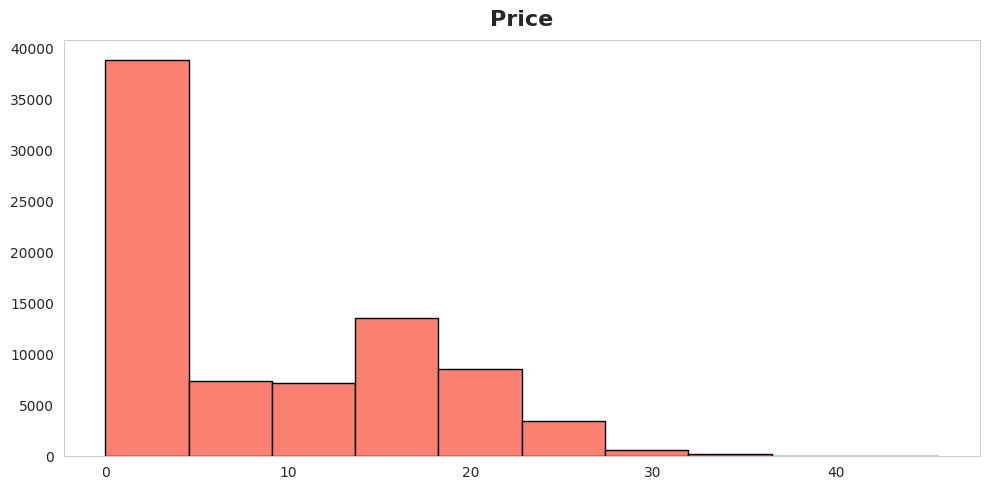

In [177]:
df_cleaned.hist(column='Price', bins=10, grid=False, figsize=(10, 5), color='salmon', edgecolor='black')

(array([3.8853e+04, 7.4120e+03, 7.1740e+03, 1.3558e+04, 8.5060e+03,
        3.4850e+03, 6.4400e+02, 1.7900e+02, 5.0000e+01, 2.3000e+01]),
 array([ 0.        ,  4.56290264,  9.12580527, 13.68870791, 18.25161054,
        22.81451318, 27.37741581, 31.94031845, 36.50322108, 41.06612372,
        45.62902635]),
 <BarContainer object of 10 artists>)

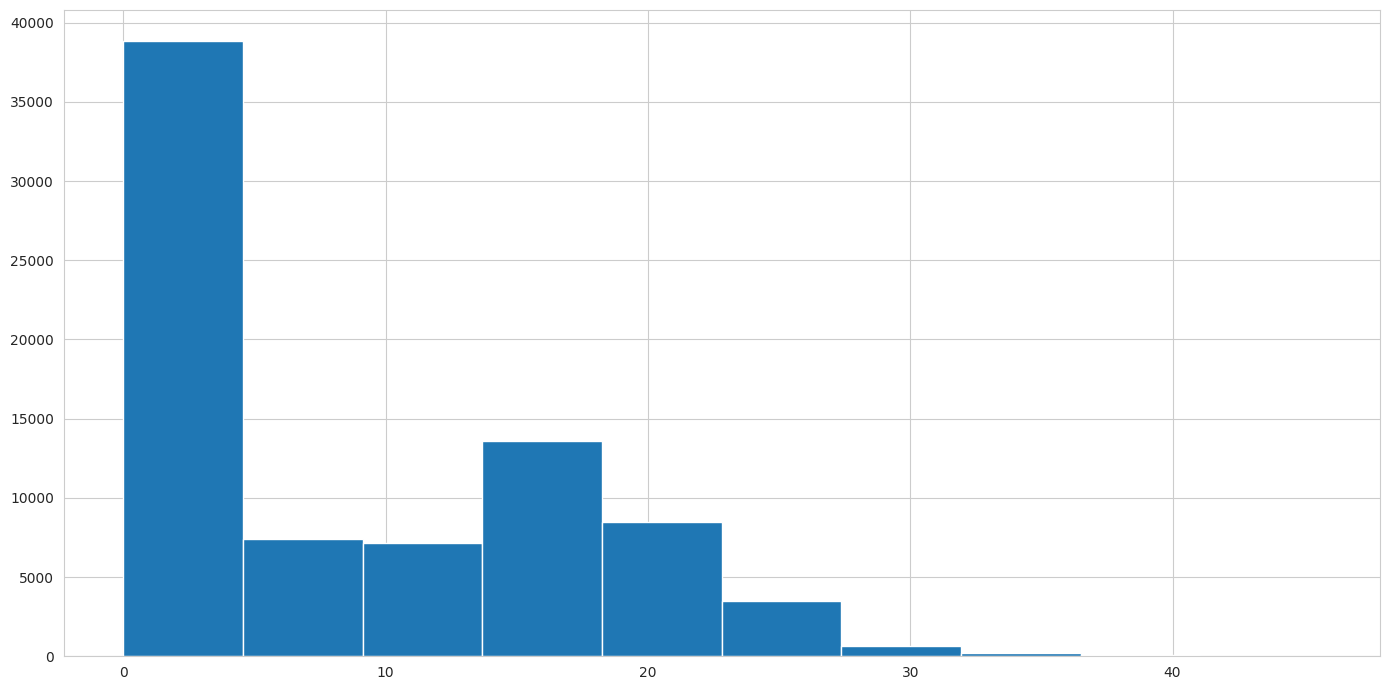

In [178]:
plt.hist(df_cleaned['Price'])

(array([3.6840e+04, 0.0000e+00, 2.3000e+01, 4.9000e+02, 4.1600e+03,
        5.4510e+03, 1.1759e+04, 1.7432e+04, 3.5390e+03, 1.9000e+02]),
 array([0.        , 0.35733899, 0.71467797, 1.07201696, 1.42935594,
        1.78669493, 2.14403392, 2.5013729 , 2.85871189, 3.21605087,
        3.57338986]),
 <BarContainer object of 10 artists>)

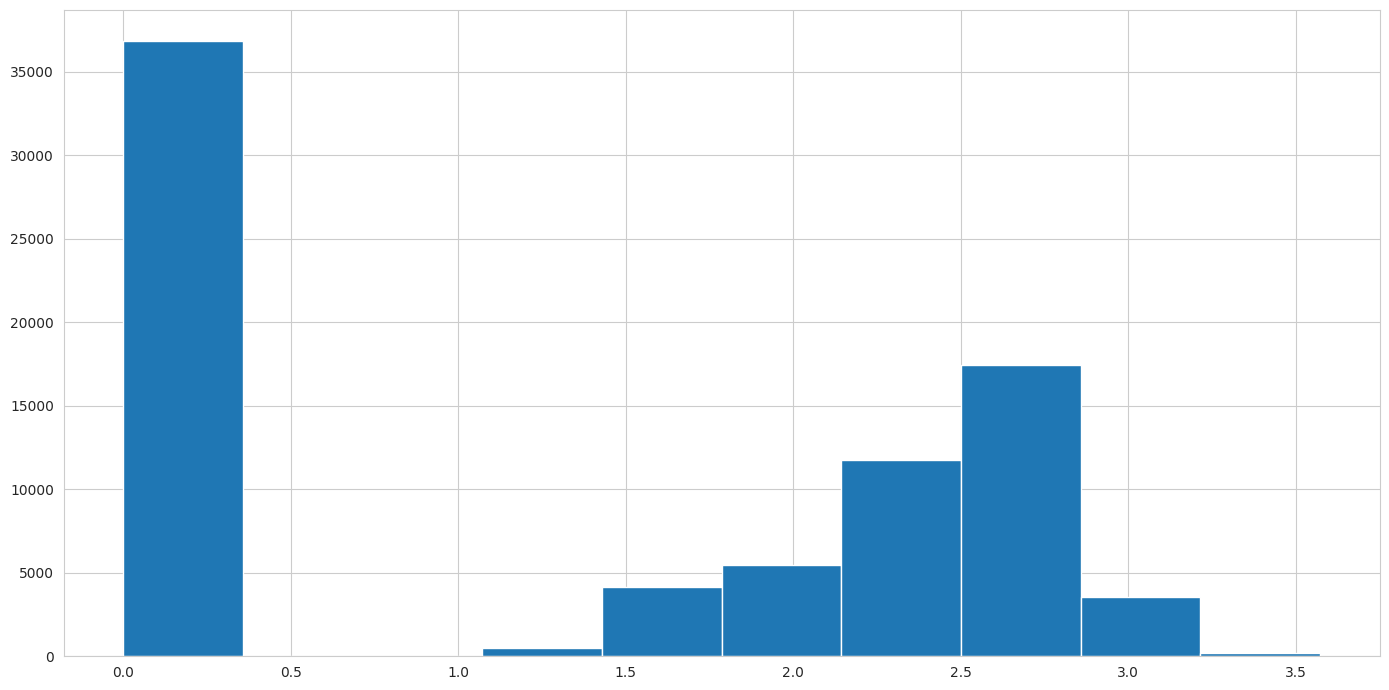

In [179]:
plt.hist(np.cbrt(df_cleaned['Price']))

In [180]:
#plt.hist(np.log(df_cleaned['Price']))

In [181]:
df_cleaned['Price'] =  np.cbrt(df_cleaned['Price'])

In [182]:
#plt.hist(df_cleaned['Price'])

In [183]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_clean is your cleaned DataFrame

# Separate features and target variable
X = df_cleaned.drop(columns=['Price'])
y = df_cleaned['Price']

# Identify categorical and numerical columns
categorical_features = ['Manufacturer', 'Model', 'Category', 'FuelType', 'DriveWheels', 'GearBox', 'Doors', 'Wheel', 'LeatherInterior']
numerical_features = ['Year', 'Mileage', 'EngineVolume', 'Clearance']

# Create preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Create a preprocessing and modeling pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 1.03
R^2 Score: 0.32


In [202]:
# prompt: do feature engineering for best feature for prediction with columns weight in % Asc

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Apply SelectKBest with f_regression to get feature importances
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(model_pipeline.named_steps['preprocessor'].transform(X_train), y_train)

# Get feature scores and column names
feature_scores = selector.scores_
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_scores
})

# Sort by importance and calculate percentage weight
feature_importances = feature_importances.sort_values('Score', ascending=True)
feature_importances['Weight (%)'] = (feature_importances['Score'] / feature_importances['Score'].sum()) * 100

print(feature_importances)


                         Feature        Score    Weight (%)
1176         cat__Model_G 55 AMG     0.000006  9.236345e-09
22       cat__Manufacturer_FOTON     0.000008  1.241565e-08
759           cat__Model_Clarity     0.000061  9.536014e-08
677      cat__Model_Camry HIBRID     0.000091  1.412288e-07
1790      cat__Model_Prius prius     0.000131  2.041486e-07
...                          ...          ...           ...
2470      cat__GearBox_Tiptronic  3807.872875  5.933473e+00
2477  cat__LeatherInterior_False  4766.436087  7.427117e+00
2478   cat__LeatherInterior_True  4766.436087  7.427117e+00
2468      cat__GearBox_Automatic  6134.833034  9.559369e+00
3                 num__Clearance  6497.489194  1.012446e+01

[2479 rows x 3 columns]


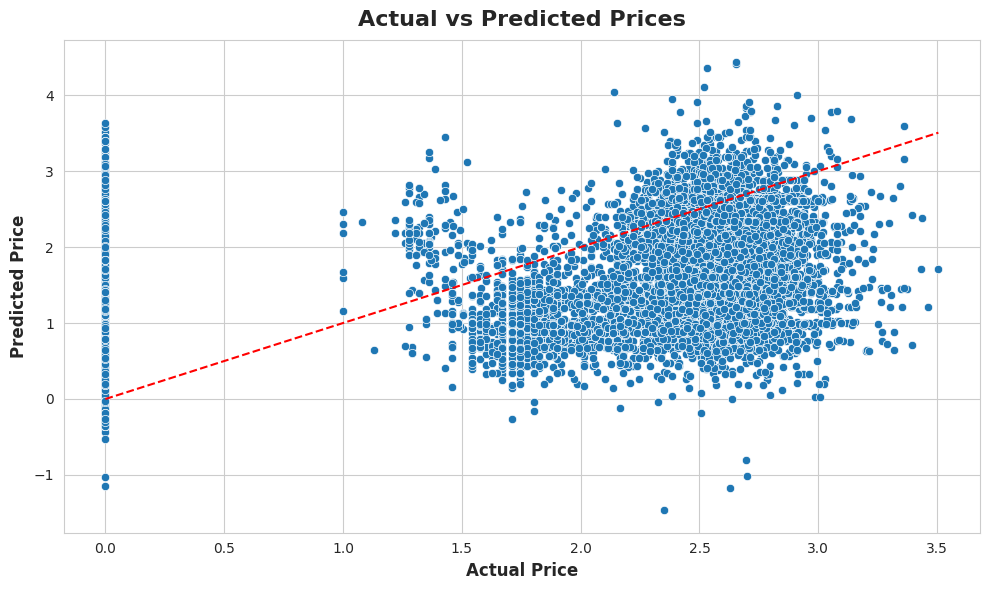

In [186]:
# prompt: create graph with Actual price with predicted price

import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=comparison_df)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.show()


In [187]:
# prompt: create funtion to adjust model intercept with graph with Actual price with predicted price

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def adjust_intercept_and_plot(model_pipeline, X_test, y_test, adjusted_intercept):
  """
  Adjusts the intercept of a linear model and plots actual vs predicted prices.

  Args:
    model_pipeline: A fitted scikit-learn Pipeline with a LinearRegression model.
    X_test: The test features.
    y_test: The test target values.
  """

  # Get the original intercept
  original_intercept = model_pipeline.named_steps['model'].intercept_

  # Calculate the mean difference between actual and predicted values
  y_pred = model_pipeline.predict(X_test)
  mean_difference = np.mean(y_test - y_pred)

  # Adjust the intercept

  model_pipeline.named_steps['model'].intercept_ = adjusted_intercept

  # Make predictions with the adjusted intercept
  y_pred_adjusted = model_pipeline.predict(X_test)

  # Create a DataFrame for comparison
  comparison_df = pd.DataFrame({
      'Actual Price': y_test,
      'Predicted Price (Original)': y_pred,
      'Predicted Price (Adjusted)': y_pred_adjusted
  })

  # Plot the comparison
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x='Actual Price', y='Predicted Price (Original)', data=comparison_df, label='Original', alpha=0.5)
  sns.scatterplot(x='Actual Price', y='Predicted Price (Adjusted)', data=comparison_df, label='Adjusted', alpha=0.5)
  plt.xlabel('Actual Price')
  plt.ylabel('Predicted Price')
  plt.title('Actual vs Predicted Prices (Before and After Intercept Adjustment)')

  # Add a diagonal line for reference
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

  plt.legend()
  plt.show()



In [188]:
model_pipeline.named_steps['model'].intercept_

1.671166256016094

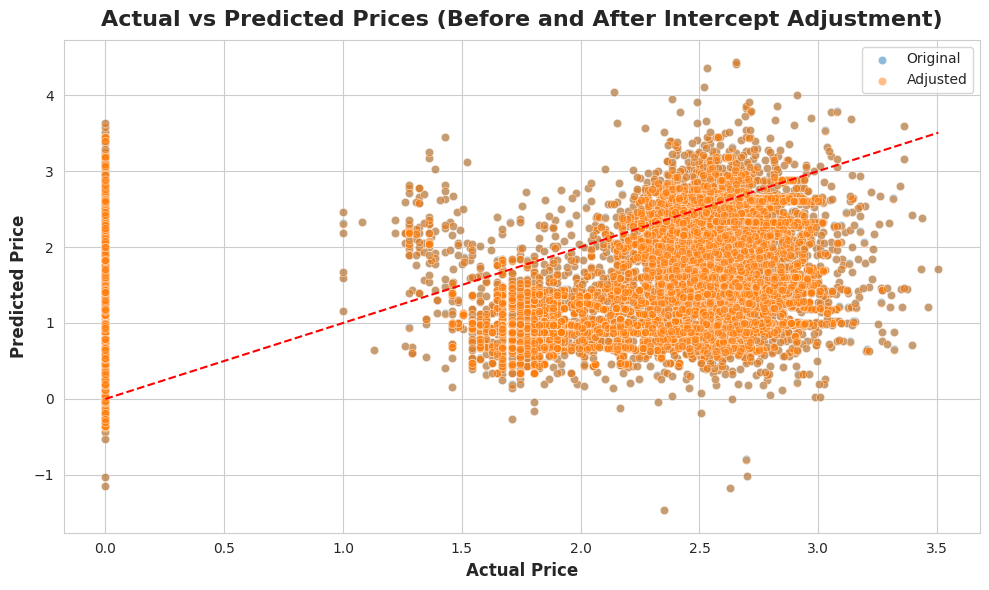

In [191]:

# Call the function to adjust the intercept and plot the results
adjust_intercept_and_plot(model_pipeline, X_test, y_test, 1.67)

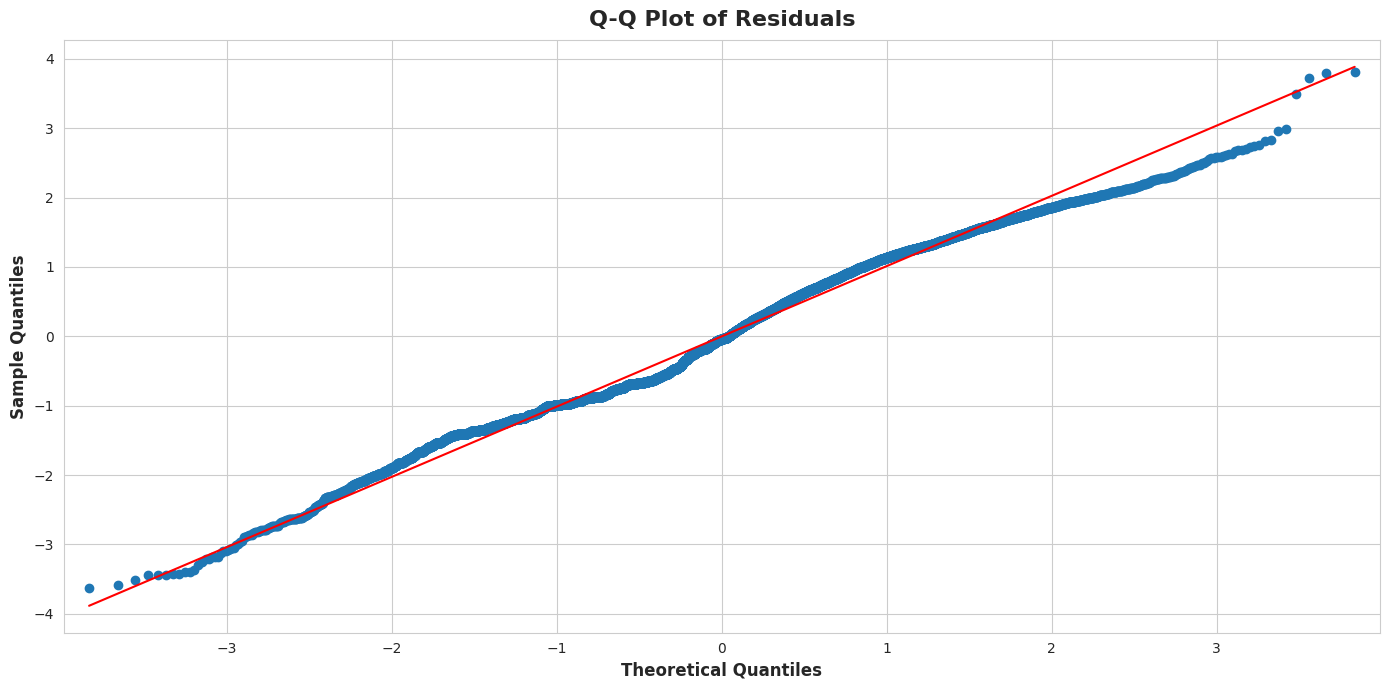

In [190]:
# prompt: Provide Q-Q plot for mode

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit the model to the training data (assuming model_pipeline is already defined)
model_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_pipeline.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Create a Q-Q plot of the residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


In [ ]:
# prompt: model_pipeline mean sqare and r squre

# Assuming 'model_pipeline', 'X_test', and 'y_test' are already defined

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R^2) score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


In [ ]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed


# Separate features and target variable
X = df_cleaned.drop(columns=['Price'])
y = df_cleaned['Price']

# Identify categorical and numerical columns
categorical_features = ['Manufacturer', 'Model', 'Category', 'FuelType', 'DriveWheels', 'GearBox', 'Doors', 'Wheel', 'LeatherInterior']
numerical_features = ['Year', 'Mileage', 'EngineVolume', 'Clearance']

# Create preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Create a new pipeline with polynomial features
poly_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),  # Add polynomial features step
    ('model', LinearRegression())
])

# Fit the polynomial regression model
poly_model_pipeline.fit(X_train, y_train) # The fit method should still use the original X_train

# Make predictions on the test data
y_pred_poly = poly_model_pipeline.predict(X_test)

# Evaluate the polynomial regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - Mean Squared Error: {mse_poly:.2f}")
print(f"Polynomial Regression - R^2 Score: {r2_poly:.2f}")

In [ ]:
# prompt: q-q plot for poly_model_pipeline

import matplotlib.pyplot as plt
# Make predictions on the test set using the polynomial model
y_pred_poly = poly_model_pipeline.predict(X_test)

# Calculate residuals for the polynomial model
residuals_poly = y_test - y_pred_poly

# Create a Q-Q plot of the residuals for the polynomial model
sm.qqplot(residuals_poly, line='s')
plt.title('Q-Q Plot of Residuals (Polynomial Regression)')
plt.show()


In [ ]:
plot_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=plot_data, alpha=0.6)
plt.plot([plot_data['Actual'].min(), plot_data['Actual'].max()],
         [plot_data['Actual'].min(), plot_data['Actual'].max()],
         color='red', linestyle='--', linewidth=2)
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer

# Log transformation function
def log_transform(X):
    X = X.copy()
    if 'Mileage' in X.columns:
        X['LogMileage'] = np.log1p(X['Mileage'])  # log1p handles log(0) cases
    if 'EngineVolume' in X.columns:
        X['LogEngineVolume'] = np.log1p(X['EngineVolume'])
    return X[['LogMileage', 'LogEngineVolume']]

# Assuming df_clean is your cleaned DataFrame
X = df_cleaned.drop(columns=['Price'])
y = df_cleaned['Price']

# Identify categorical and numerical columns
categorical_features = ['Manufacturer', 'Model', 'Category', 'FuelType', 'DriveWheels', 'GearBox', 'Doors', 'Wheel', 'LeatherInterior']
numerical_features = ['Year', 'Mileage', 'EngineVolume', 'Clearance']

# Create preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines with a feature engineering step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
        ('log', FunctionTransformer(log_transform), ['Mileage', 'EngineVolume'])
    ])

# Create a preprocessing and modeling pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


GBR Model

In [ ]:
#####GBR model#######

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy.stats import uniform, randint

# Sample DataFrame (replace with your actual DataFrame)
# df_clean = pd.read_csv('your_data.csv')  # Load your data here

# Define features and target
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

# Define categorical and numerical features
categorical_features = ['Manufacturer', 'Model', 'Category', 'FuelType', 'DriveWheels', 'GearBox', 'Doors', 'Wheel', 'LeatherInterior']
numerical_features = ['Year', 'Mileage', 'EngineVolume', 'Clearance']

# Preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Generate polynomial features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Define the Gradient Boosting Regressor and hyperparameters
gbr = GradientBoostingRegressor()

param_distributions = {
    'model__n_estimators': randint(50, 200),
    'model__learning_rate': uniform(0.01, 0.2),
    'model__max_depth': randint(3, 10)
}

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', gbr)])

# Randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
random_search.fit(X, y)

# Best model
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R^2 Scores: {cv_scores}")
print(f"Average Cross-validated R^2 Score: {np.mean(cv_scores)}")

# Train-test split and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print("-" * 50)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Sample DataFrame (replace with your actual DataFrame)
# df_clean = pd.read_csv('your_data.csv')  # Load your data here

# Define features and target
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

# Define categorical and numerical features
categorical_features = ['Manufacturer', 'Model', 'Category', 'FuelType', 'DriveWheels', 'GearBox', 'Doors', 'Wheel', 'LeatherInterior']
numerical_features = ['Year', 'Mileage', 'EngineVolume', 'Clearance']

# Preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Define the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Define the parameter search space for Bayesian Optimization with reduced ranges
search_space = {
    'model__n_estimators': Integer(50, 150),  # Narrowed range
    'model__learning_rate': Real(0.05, 0.15, prior='log-uniform'),  # Narrowed range
    'model__max_depth': Integer(3, 8)  # Narrowed range
}

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', gbr)])

# Bayesian search for hyperparameter tuning
bayes_search = BayesSearchCV(
    pipeline,
    search_space,
    n_iter=10,  # Reduced number of iterations
    cv=3,  # Reduced number of folds
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Fit the model with Bayesian Optimization
bayes_search.fit(X, y)

# Best model
best_model = bayes_search.best_estimator_
print(f"Best Parameters: {bayes_search.best_params_}")

# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=3, scoring='r2', n_jobs=-1)  # Reduced folds
print(f"Cross-validated R^2 Scores: {cv_scores}")
print(f"Average Cross-validated R^2 Score: {np.mean(cv_scores)}")

# Train-test split and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print("-" * 50)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy.stats import uniform, randint

# Sample DataFrame (replace with your actual DataFrame)
# df_clean = pd.read_csv('your_data.csv')  # Load your data here

# Define features and target
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

# Define categorical and numerical features
categorical_features = ['Manufacturer', 'Model', 'Category', 'FuelType', 'DriveWheels', 'GearBox', 'Doors', 'Wheel', 'LeatherInterior']
numerical_features = ['Year', 'Mileage', 'EngineVolume', 'Clearance']

# Preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('log', FunctionTransformer(np.log1p, validate=True)),  # Apply log transformation to reduce skewness
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Generate polynomial features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Define the Gradient Boosting Regressor and hyperparameters
gbr = GradientBoostingRegressor()

param_distributions = {
    'model__n_estimators': randint(50, 200),
    'model__learning_rate': uniform(0.01, 0.2),
    'model__max_depth': randint(3, 10)
}

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', gbr)])

# Randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
random_search.fit(X, y)

# Best model
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R^2 Scores: {cv_scores}")
print(f"Average Cross-validated R^2 Score: {np.mean(cv_scores)}")

# Train-test split and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print("-" * 50)


KNN model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy.stats import randint

# Sample DataFrame (replace with your actual DataFrame)
# df_clean = pd.read_csv('your_data.csv')  # Load your data here

# Define features and target
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

# Define categorical and numerical features
categorical_features = ['Manufacturer', 'Model', 'Category', 'FuelType', 'DriveWheels', 'GearBox', 'Doors', 'Wheel', 'LeatherInterior']
numerical_features = ['Year', 'Mileage', 'EngineVolume', 'Clearance']

# Preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Generate polynomial features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Define the K-Nearest Neighbors Regressor and hyperparameters
knn = KNeighborsRegressor()

param_distributions = {
    'model__n_neighbors': randint(3, 20),
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', knn)])

# Randomized search for hyperparameter tuning
# Limiting n_jobs to 1 to avoid parallel processing issues
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=10,
    cv=5,
    scoring='r2',
    n_jobs=1,  # Change to 1 to avoid parallel execution issues
    random_state=42
)

# Fit the model
random_search.fit(X, y)

# Best model
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2', n_jobs=1)  # Avoid parallel execution here as well
print(f"Cross-validated R^2 Scores: {cv_scores}")
print(f"Average Cross-validated R^2 Score: {np.mean(cv_scores)}")

# Train-test split and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print("-" * 50)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

# Define features and target
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

# Define categorical and numerical features
categorical_features = ['Manufacturer', 'Model', 'Category', 'FuelType', 'DriveWheels', 'GearBox', 'Doors', 'Wheel', 'LeatherInterior']
numerical_features = ['Year', 'Mileage', 'EngineVolume', 'Clearance']

# Preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('pca', PCA(n_components=0.95))
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Define the K-Nearest Neighbors Regressor
knn = KNeighborsRegressor()

# Reduced hyperparameter grid
param_grid = {
    'model__n_neighbors': [5, 10, 15],  # Reduced range
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]  # Manhattan and Euclidean only
}

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selection', SelectKBest(f_regression, k='all')),
                           ('model', knn)])

# Grid search for hyperparameter tuning with limited parallelism
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=1,  # Avoid parallel processing to save memory
    verbose=2
)

grid_search.fit(X, y)

# Best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2', n_jobs=1)
print(f"Cross-validated R^2 Scores: {cv_scores}")
print(f"Average Cross-validated R^2 Score: {np.mean(cv_scores)}")

# Train-test split and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Random Forest regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

# Define categorical and numerical features
categorical_features = ['Manufacturer', 'Model', 'Category', 'FuelType', 'DriveWheels', 'GearBox', 'Doors', 'Wheel', 'LeatherInterior']
numerical_features = ['Year', 'Mileage', 'EngineVolume', 'Clearance']

# Preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Create polynomial features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Define the Random Forest model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Define your dataset (assumed df_clean exists)
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

categorical_features = ['Manufacturer', 'Model', 'Category', 'FuelType', 'DriveWheels', 'GearBox', 'Doors', 'Wheel', 'LeatherInterior']
numerical_features = ['Year', 'Mileage', 'EngineVolume', 'Clearance']

# Feature Engineering (with simplified PolynomialFeatures)
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Consider removing this if too slow
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

model = RandomForestRegressor(random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

param_distributions = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__max_features': ['auto', 'sqrt']
}

# RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X, y)

# Evaluation
best_model = random_search.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint

# Assuming df_clean is your DataFrame with the 'Price' target column
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

# Define categorical and numerical features
categorical_features = ['Manufacturer', 'Model', 'Category', 'FuelType', 'DriveWheels', 'GearBox', 'Doors', 'Wheel', 'LeatherInterior']
numerical_features = ['Year', 'Mileage', 'EngineVolume', 'Clearance']

# Feature Engineering
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Add interaction features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Complete Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', xgb_model)])

# Define parameter grid for hyperparameter tuning
param_distributions = {
    'regressor__n_estimators': randint(100, 1000),
    'regressor__max_depth': randint(3, 15),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__subsample': uniform(0.5, 0.5),
    'regressor__colsample_bytree': uniform(0.5, 0.5),
    'regressor__gamma': uniform(0, 1),
    'regressor__reg_alpha': uniform(0, 1),  # L1 regularization
    'regressor__reg_lambda': uniform(0, 1)   # L2 regularization
}

# Randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X, y)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Cross-validation scores
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R^2 Scores: {cv_scores}")
print(f"Average Cross-validated R^2 Score: {np.mean(cv_scores)}")


XGB Regressor

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint

# Assuming df_clean is your DataFrame with the 'Price' target column
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

# Define categorical and numerical features
categorical_features = ['Manufacturer', 'Model', 'Category', 'FuelType', 'DriveWheels', 'GearBox', 'Doors', 'Wheel', 'LeatherInterior']
numerical_features = ['Year', 'Mileage', 'EngineVolume', 'Clearance']

# Feature Engineering
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Add interaction features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Complete Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', xgb_model)])

# Define parameter grid for hyperparameter tuning
param_distributions = {
    'regressor__n_estimators': randint(100, 1000),
    'regressor__max_depth': randint(3, 15),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__subsample': uniform(0.5, 0.5),
    'regressor__colsample_bytree': uniform(0.5, 0.5),
    'regressor__gamma': uniform(0, 1),
    'regressor__reg_alpha': uniform(0, 1),  # L1 regularization
    'regressor__reg_lambda': uniform(0, 1),  # L2 regularization
    'regressor__min_child_weight': randint(1, 10)  # New parameter to try
}

# Randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=30, cv=5, scoring='r2', n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X, y)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Cross-validation scores
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R^2 Scores: {cv_scores}")
print(f"Average Cross-validated R^2 Score: {np.mean(cv_scores)}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from scipy.stats import uniform, randint
from sklearn.base import TransformerMixin

# Custom transformer to convert sparse matrices to dense
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.toarray()

# Assuming df_clean is your DataFrame with the 'Price' target column
X = df_clean.drop(columns=['Price'])
y = df_clean['Price']

# Define categorical and numerical features
categorical_features = ['Manufacturer', 'Model', 'Category', 'FuelType', 'DriveWheels', 'GearBox', 'Doors', 'Wheel', 'LeatherInterior']
numerical_features = ['Year', 'Mileage', 'EngineVolume', 'Clearance']

# Feature Engineering
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Add interaction features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('dense', DenseTransformer())  # Convert sparse matrix to dense
])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Bayesian Ridge model
bayesian_ridge_model = BayesianRidge()

# Complete Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', bayesian_ridge_model)])

# Define parameter grid for hyperparameter tuning
param_distributions = {
    'regressor__alpha_1': uniform(1e-6, 1e-1),
    'regressor__alpha_2': uniform(1e-6, 1e-1),
    'regressor__lambda_1': uniform(1e-6, 1e-1),
    'regressor__lambda_2': uniform(1e-6, 1e-1),
    'regressor__fit_intercept': [True, False]
}

# Randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=20, cv=3, scoring='r2', n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X, y)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-train the model using the entire training set
final_model = best_model
final_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Cross-validation scores
cv_scores = cross_val_score(final_model, X, y, cv=3, scoring='r2')
print(f"Cross-validated R^2 Scores: {cv_scores}")
print(f"Average Cross-validated R^2 Score: {np.mean(cv_scores)}")
